# Part I - 201902-fordgobike-tripdata
## by Kolawole Ayoko

## Introduction
> The data includes details on 183,412 trips taken in a bike-sharing program that serves the larger San Francisco Bay area. In addition to duration (secs), the data characteristics also contain DateTime, Customer Type, Gender, and a few more variables.


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Loading my Dataset(fordgobike-Tripdata)

In [3]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")

#### Viewing The DataFrame

In [4]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


#### Checking and getting some information on the dataframe and Data Types

In [5]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### DataFrame Wrangling and Analysis

#### From the dataframe we were given the locations in terms of longitude and lattitude, which means we can get the distance between the start and stop stations.

Using The Haversine FUnction to Calculate For the distance

In [7]:
# to calculate the distance between the two geolocations
import haversine as hs
from haversine import Unit

In [8]:
def haversine(lat1, long1, lat2, long2):
    """
    This function takes in the two locations by their longitude and lattitude then
    uses the haversine module to calculate the distance between them
    """
    loc1 = (lat1, long1)
    loc2 = (lat2, long2)
    
    
    
    return hs.haversine(loc1, loc2, unit=Unit.MILES)

In [9]:
# Calculating the distance(in miles) between the various start and end points
df['distance_miles'] = df.apply( lambda x : haversine(x['start_station_latitude'], x['start_station_longitude'],  x['end_station_latitude'], x['end_station_longitude']), axis=1)

In [10]:
# Checking the dataframe to see changes
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_miles
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.338467
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,1.083051


In [11]:
# Converting the duration of the trips in seconds to hours (1 hour = 3600s)
df['duration_hrs'] = df.apply(lambda x : x['duration_sec'] / 3600, axis=1)

#### Since we know the distance and the time for the trips, then we can calculate the speed of the Journey.

speed = Distance / Time

In [12]:
df['speed_mph'] = df['distance_miles'] / df['duration_hrs']

In [13]:
df.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_miles,duration_hrs,speed_mph
141357,428,2019-02-07 18:05:31.0060,2019-02-07 18:12:39.1870,266.0,Parker St at Fulton St,37.862464,-122.264791,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,5511,Subscriber,1999.0,Male,No,0.903899,0.118889,7.602892
120197,802,2019-02-11 17:09:32.0560,2019-02-11 17:22:54.1440,14.0,Clay St at Battery St,37.795001,-122.399970,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,4820,Subscriber,1989.0,Male,No,1.291676,0.222778,5.798045


In [14]:
# Converting the start time and end times into datetime objects
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [15]:
# Converting usertype, member_gender and bikeshare_for_all_trip into categorical data
df["user_type"] = df.user_type.astype('category')
df["member_gender"] = df.member_gender.astype('category')
df["bike_share_for_all_trip"] = df.bike_share_for_all_trip.astype('category')

In [16]:
# Getting member's age from their birth year
df["member_age"] = 2019 - df["member_birth_year"]

#### The month  and year of the ride won't be plausible for analysis because majority of the rides took place in one month of the same year.

In [17]:
# Start time  day of week
df["start_time"].dt.day_of_week
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_ride_start'] = df['start_time'].dt.day_of_week.apply(lambda x : days[x])
# End time day of the week
df["end_time"].dt.month
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_ride_end'] = df['end_time'].dt.day_of_week.apply(lambda x : days[x])
# Hour of Ride
df["start_hour"] = df["start_time"].dt.hour
df["end_hour"] = df["end_time"].dt.hour

#### Majority of the trips happened within a day with only a small fraction of trips extending to the next Day.

### structure of the dataset

> This dataset has 183412 rows by 25 Columns and includes details on 183,412 trips taken in a bike-sharing program that serves the larger San Francisco Bay area. In addition to duration (secs), the data characteristics also contain DateTime, Customer Type, Gender, and a few more variables.

### The main feature(s) of interest in the dataset

> The main feature of interest in this dataset i think is the duration of the rides, checking to see if features like distance, member gender or Age has an influence on the time spent on a journey.

### Features in the dataset I think will help support my investigation into my feature(s) of interest?

> distance, member's Age from Birth year

## Univariate Exploration

In [18]:
# Setting the theme for seaborn plots in the notebook
sns.set_theme(style="whitegrid")

#### Looking at the general distribution of the duration of the journeys

#### Question 1
What is the distribution of the duration of the trips in seconds

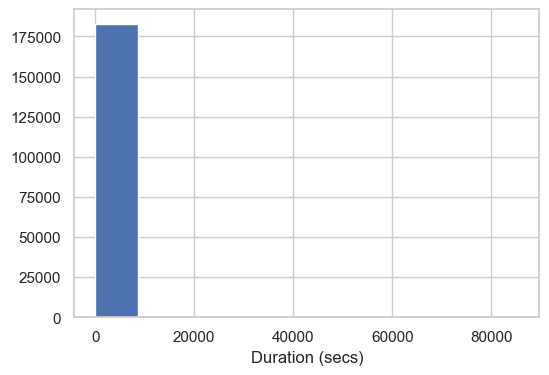

In [19]:
# Lets take a look at the distribution of the duration of the trips 
plt.figure(figsize=[6, 4])
plt.hist(data = df, x = 'duration_sec')
plt.xlabel('Duration (secs)')
plt.show()

#### This distribution plot will be on the log scale because the initial plot has a nearly invinsible tail

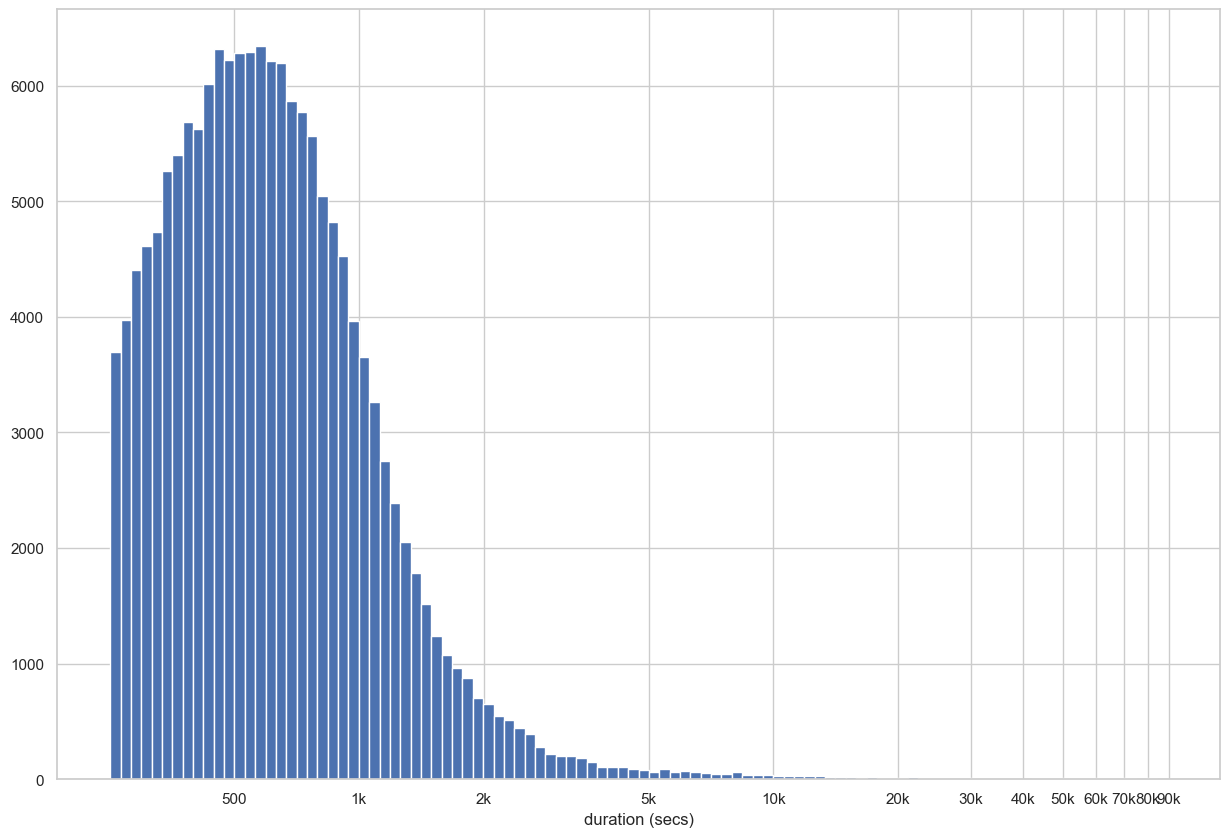

In [20]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[15, 10])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4, 8e4, 9e4], [500, '1k', '2k', '5k', '10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k', '90k'])
plt.xlabel('duration (secs)')
plt.show()

#### Observation

Duration has a long-tailed distribution skewed to the right, with a lot of the time duration on the low end, and very few on the high duration end. When plotted on a log-scale, the duration distribution seems to have its mode between 500 and 1000 seconds.

Next up, the first predictor variable of interest: distance.

#### Checking to seee the distribution of the trip start times and end times

#### Question 2
What is the distribution of the start hour of the trips?

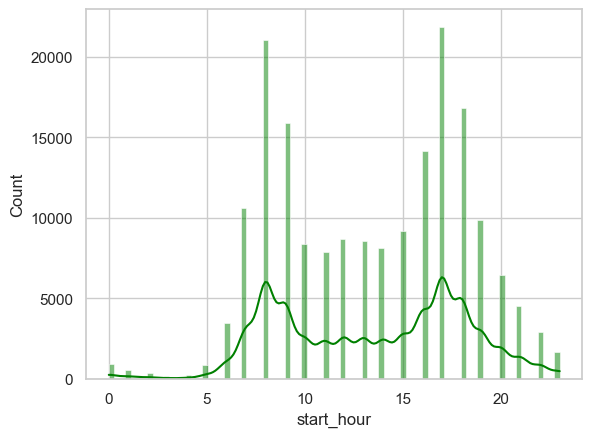

In [21]:
sns.histplot(data=df, x="start_hour", color="green", kde=True);

#### Observations
The graph clearly shows two peaks with majority of the trips starting around 8am in the morning and around 5pm in the evening. 
This might be explained by people having different preference for when they want to ride based on type of jobs or other factors.

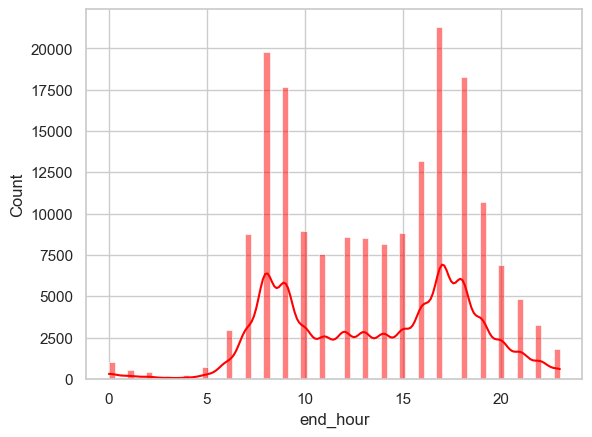

In [22]:
sns.histplot(data=df, x="end_hour", color='red', kde=True);

#### Observation
The graph also clearly shows two peaks with majority of the trips ending around 8am in the morning and around 5pm in the evening. 
The fact that this plot is identical to the previous ones clearly shows that majority of the trips were completed within the hour

In [23]:
df.sample(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,distance_miles,duration_hrs,speed_mph,member_age,day_of_ride_start,day_of_ride_end,start_hour,end_hour
24340,252,2019-02-25 18:27:37.141,2019-02-25 18:31:49.644,109.0,17th St at Valencia St,37.763316,-122.421904,133.0,Valencia St at 22nd St,37.755213,...,Female,Yes,0.562171,0.070000,8.031020,51.0,Monday,Monday,18,18
156060,203,2019-02-06 08:23:20.090,2019-02-06 08:26:43.111,230.0,14th St at Mandela Pkwy,37.810743,-122.291415,160.0,West Oakland BART Station,37.805318,...,Female,No,0.418775,0.056389,7.426550,49.0,Wednesday,Wednesday,8,8
46764,557,2019-02-22 09:21:27.820,2019-02-22 09:30:45.364,127.0,Valencia St at 21st St,37.756708,-122.421025,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,...,Male,No,1.523694,0.154722,9.847931,25.0,Friday,Friday,9,9
111012,921,2019-02-12 17:22:27.742,2019-02-12 17:37:48.857,19.0,Post St at Kearny St,37.788975,-122.403452,112.0,Harrison St at 17th St,37.763847,...,Male,No,1.812842,0.255833,7.086026,29.0,Tuesday,Tuesday,17,17


In [24]:
# Checking the value counts of the Member gender recorded
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

#### Checking to see the frequency of the member gender

#### Question3
What is the number of unique member gender in the dataframe?

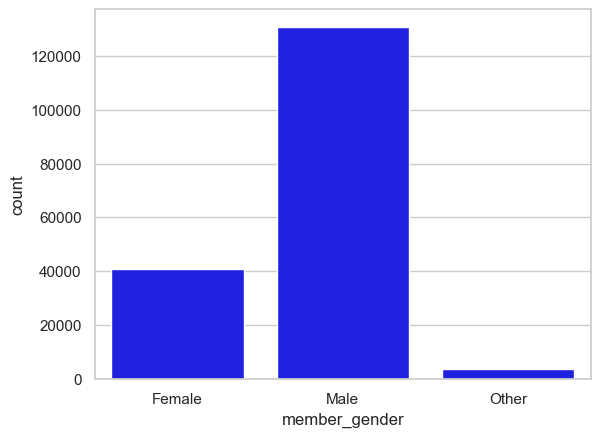

In [26]:
sns.countplot(x=df["member_gender"], color='blue');

#### Observation
From the figure above, majority of the riders in the bike sharing program are of the male gender with over 120,000 of the riders. The number of female riders clock in at just a kittle above 40,000.

#### Question4
What is the number of riders that did share their bikes in the competition?

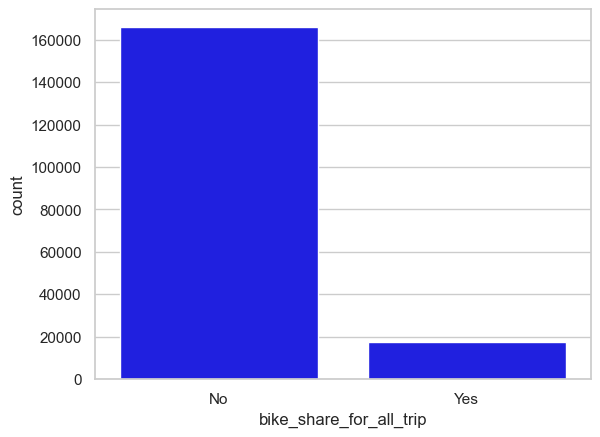

In [27]:
# Countplot to show the number of riders that shared their bikes in the bike sharing competition
sns.countplot(data = df, x=df["bike_share_for_all_trip"], color="blue");

#### Observation
The figure above showed that majority of the riders did not share their bikes for the trips. Over 160,000 did not share their bikes compared to the below 20,000 that did.

#### Question 5
What is the frequncy of the days the rides took off?

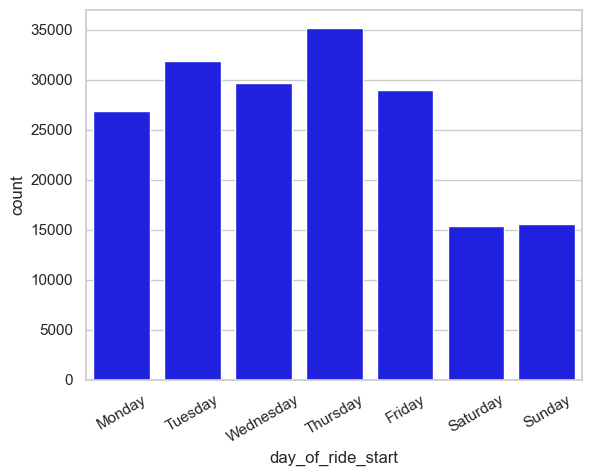

In [28]:
# Countplot to show the frequency of the day of week the rides took off
ax = sns.countplot(x=df["day_of_ride_start"], color="blue", order=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'])
ax.tick_params(axis="x", rotation=30);

#### Observation
The figure above shows that majority of the rides kicked off during the weekdays, with the weekends showing a reduced number of participation.

#### Question 6
What is the distinction between the user_types?

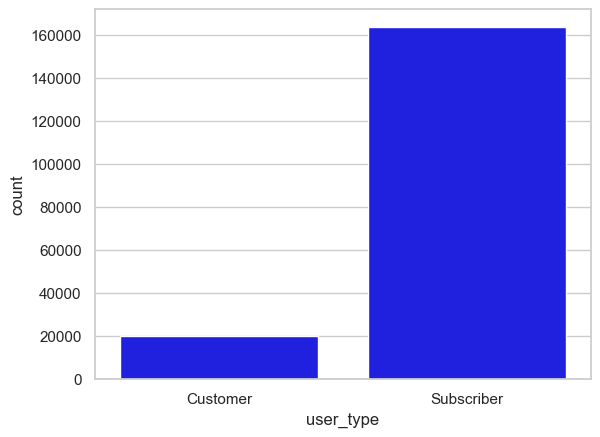

In [29]:
sns.countplot(data = df, x=df["user_type"], color="blue");

#### Observation
From the figure above, majority of the users are subscribers with over 160,000 users. This shows that just a small percentage of the riders are customers.

#### Question 7
What is the distribution of the speed in miles per hour?

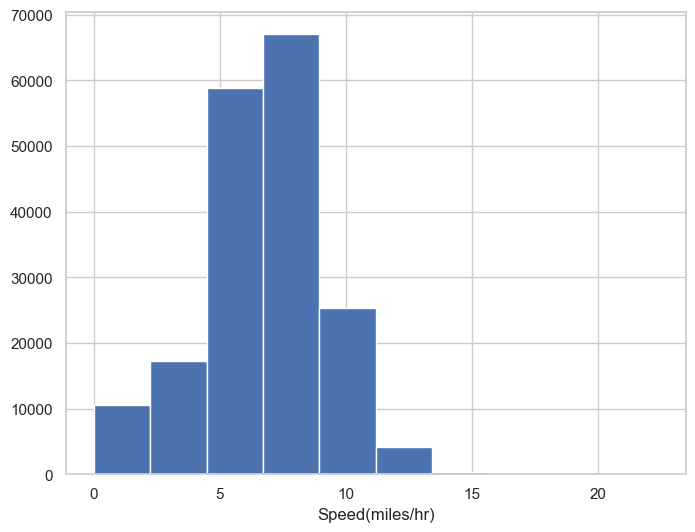

In [30]:
#Checking the distribution of the speed of the journeys in miles per hour
plt.figure(figsize=[8, 6])
plt.hist(data = df, x = 'speed_mph')
plt.xlabel('Speed(miles/hr)')
plt.show()

#### Observation
The histogram above shows a rise and fall in the counts as speed increases with peaks between five and ten miles per hour. Majority or the riders were within this speed range for their journey between stations.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

#### Question 8 
What is the distribution of the age of the riders?

<AxesSubplot: xlabel='member_age', ylabel='Count'>

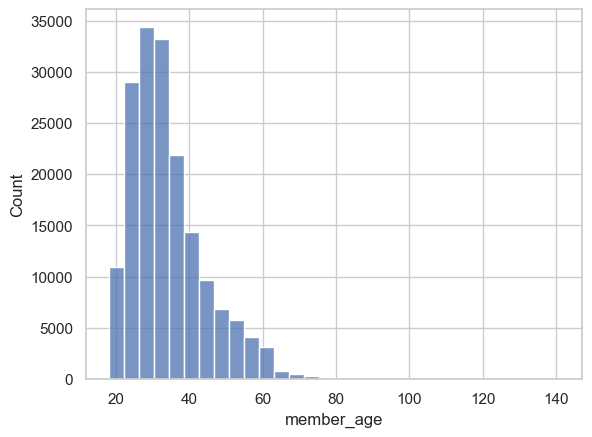

In [32]:
sns.histplot(data=df, x="member_age", bins=30)

#### Observation
The histplot above shows the distribution of the age of the riders that took part in the bike sharing event. Majority of the riders were between the ages of 20 and 40.

In [33]:
df["member_age"].max()

141.0

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The statement "duration has a long-tailed distribution skewed to the right" means that the duration data has a large number of observations with short duration, while only a few observations have a very long duration. When plotted on a log-scale, the duration distribution seems to have its mode between 500 and 1000 seconds. A log-scale plot is a type of plot where the values on the y-axis are scaled logarithmically. This allows for a better visualization of the data when there are large differences in the values. In this case, the fact that the mode (the most frequently occurring value) falls between 500 and 1000 seconds on a log-scale plot suggests that most of the data points lie in this range.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of the member_age showed that there is an outlier in the dataset as one of the members was about 141 years old which i think is unrealistic and will only raise the mean of the ages and will eventually be misleading for any meaningful interpretation. This outlier might be as a result of human error. I also found it unusual that for a bike-sharing event, majority of the riders did not "share their bikes".

## Bivariate Exploration

#### I will be separating the important features in the dataset into numeric and categorical variables

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [35]:
numeric_vars = ['duration_sec', 'distance_miles', "speed_mph", "member_age"]
categoric_vars = ['user_type', 'member_gender', ' bike_share_for_all_trip']

#### Question 9
What are the correlations between the numeric variables?

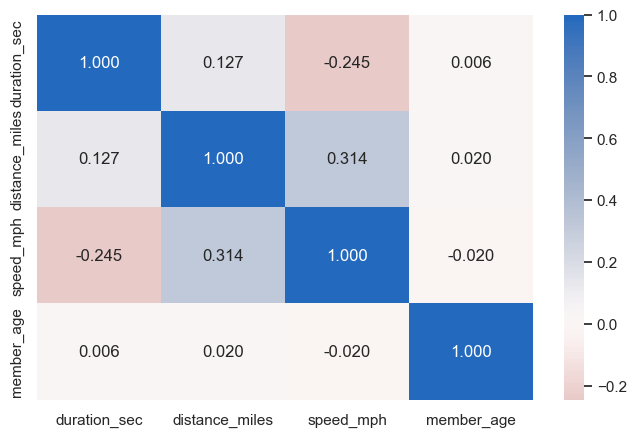

In [36]:
# correlation plot to have an overview of how the numeric features are correlated
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show();

#### Observations
From the heat map, it shows that duration in seconds and speed in miles per hour are more negatively correlated. This makes sense as when the speed increases, the time spent on a journey is meant to reduce. Distance_iles and speed_mph showed the highest positive correlation as when speed increases, the distance covered automatically increases as well.

#### Question 10
What is the relationship between the speed and age of the members?

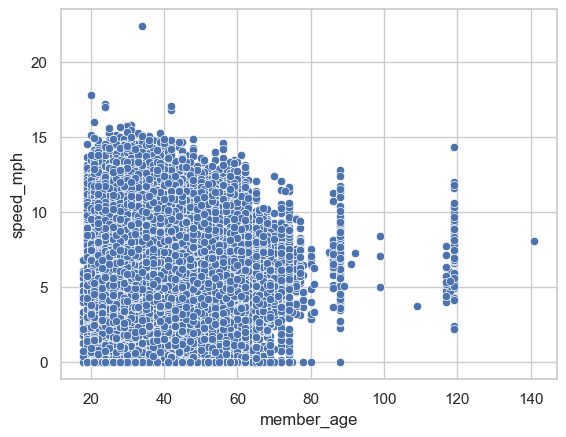

In [37]:
# Using a Scatter plot to examine the relationship between the speed and the age of the members
sns.scatterplot(data=df, x="member_age", y="speed_mph");

#### Observation
From the scatterplot, it shows a great cluster on the lower left hand side of the plot. Meaning that majority of the riders are less than 80 years of age and that majority didn't ride with a speed greater than 15 mph.

#### Pairplot to get an overview of the relationships between the numerical variables

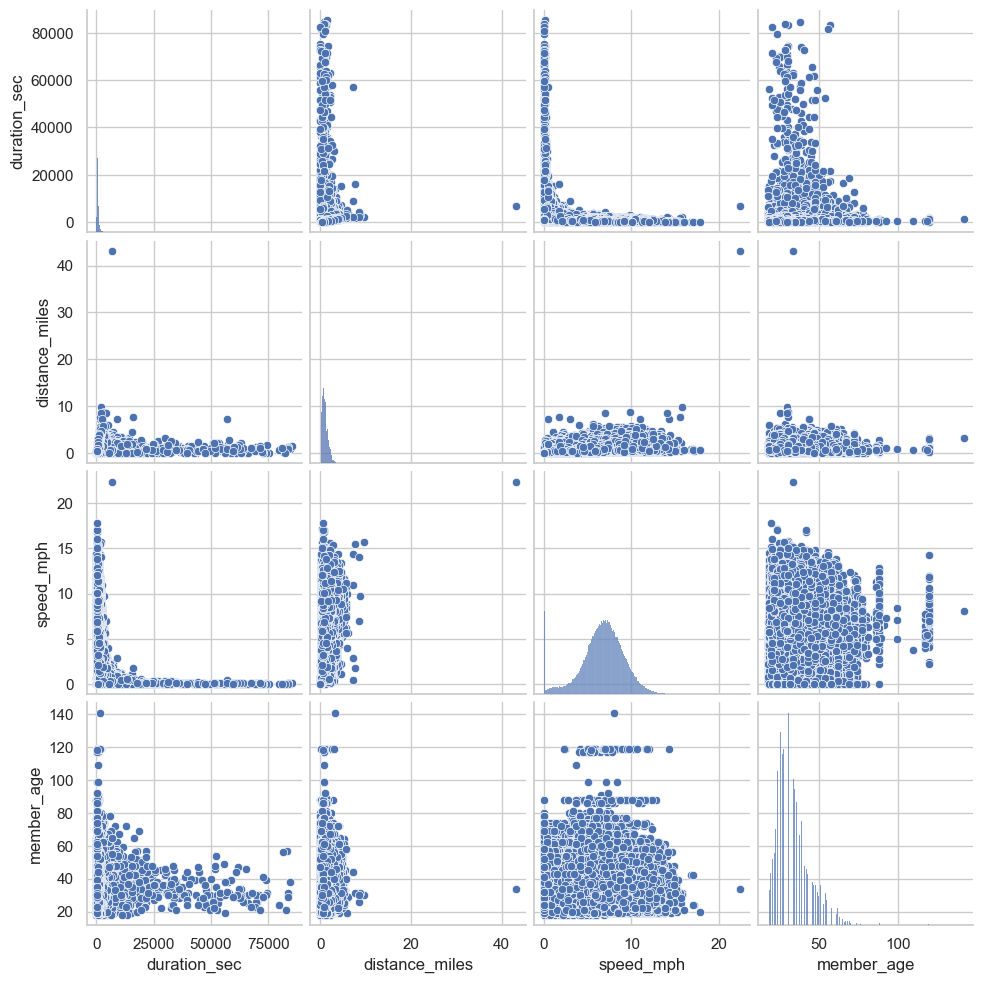

In [38]:
sns.pairplot(df, vars = numeric_vars);

#### Question 11
What is the relatioship between distance covered and the ages of the participants?

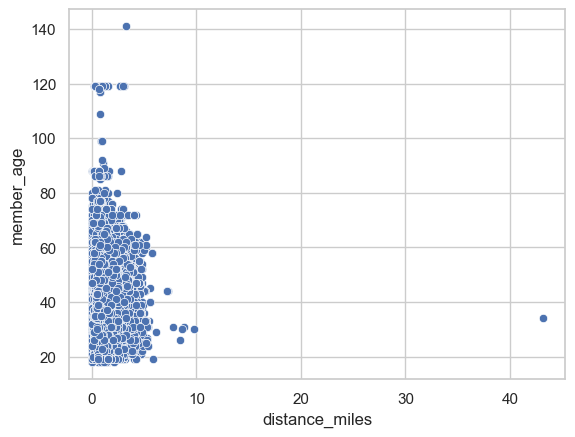

In [39]:
# Using a Scatter plot to examine the relationship between the distance covered and the age of the members
sns.scatterplot(data=df, x="distance_miles", y="member_age");

In [40]:
df["distance_miles"].max() # This distance is an outlier.

43.16624451359153

#### An outlier in the distance(miles) column is affecting our visualization and will raise the mean of the the group.

In [41]:
df.drop(index=df.loc[df['distance_miles'] == 43.16624451359153].index, inplace=True)

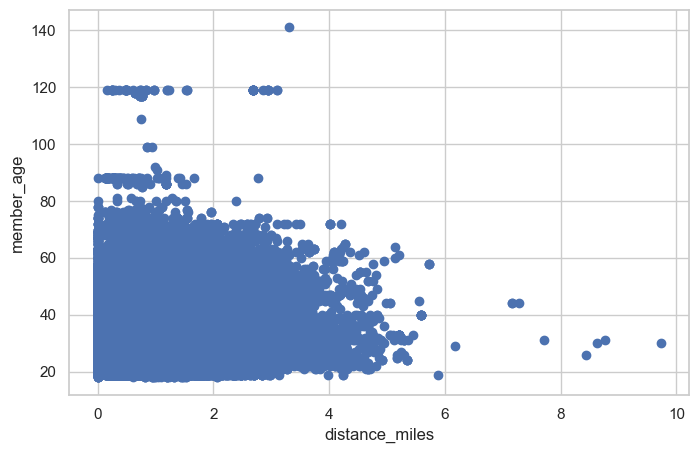

In [42]:
# Visualizing Again after removing outlier
plt.figure(figsize=[8, 5])
plt.scatter(data=df, x = 'distance_miles', y='member_age')
plt.xlabel("distance_miles")
plt.ylabel("member_age")
plt.show();

#### Observation
From the scatterplot, it shows a great cluster on the lower left hand side of the plot. Meaning that majority of the riders are less than 80 years of age and that majority didn't ride a distance greater than 5 miles.

#### Question 12
What is the relationship between duration and speed?

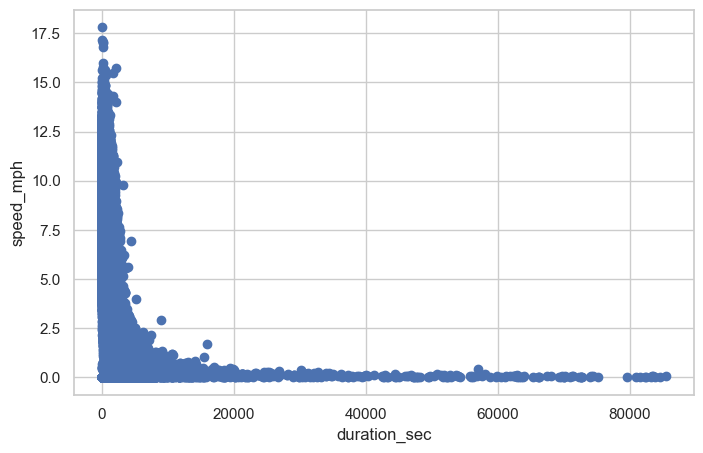

In [43]:
# Visualizing Again after removing outlier
plt.figure(figsize=[8, 5])
plt.scatter(data=df, x = 'duration_sec', y='speed_mph')
plt.xlabel("duration_sec")
plt.ylabel("speed_mph")
plt.show();

#### Observation
This shows negative correlation explained earlier with lower speed resulting in longer time spent

#### Question 13
What is the relationship between duration and member age?

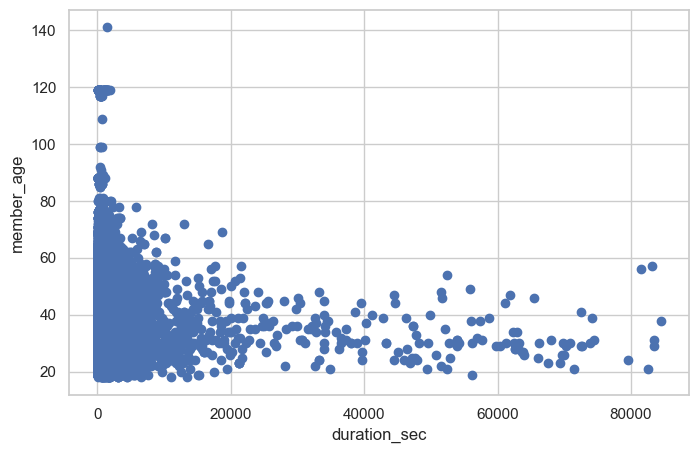

In [44]:
# Visualizing Again after removing outlier
plt.figure(figsize=[8, 5])
plt.scatter(data=df, x = 'duration_sec', y='member_age')
plt.xlabel("duration_sec")
plt.ylabel("member_age")
plt.show();

#### Observation
From the scatterplot above, some of the younger riders spent more time on the journey but the majority of the points are clustered on the lower left hand side of the plot

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183411 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183411 non-null  int64         
 1   start_time               183411 non-null  datetime64[ns]
 2   end_time                 183411 non-null  datetime64[ns]
 3   start_station_id         183214 non-null  float64       
 4   start_station_name       183214 non-null  object        
 5   start_station_latitude   183411 non-null  float64       
 6   start_station_longitude  183411 non-null  float64       
 7   end_station_id           183214 non-null  float64       
 8   end_station_name         183214 non-null  object        
 9   end_station_latitude     183411 non-null  float64       
 10  end_station_longitude    183411 non-null  float64       
 11  bike_id                  183411 non-null  int64         
 12  user_type       

#### Question 14
what is the relationship between User type and the age of the member?

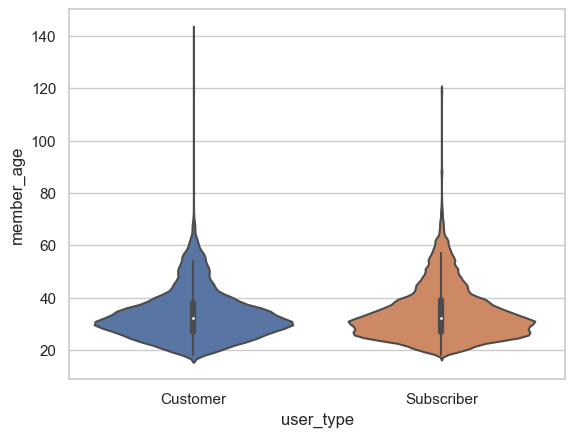

In [46]:
# Examining the relationship between User type and the age of the member
sns.violinplot(data=df, x="user_type", y="member_age");

#### Observation
The mean of the ages is slightly higher in the customer user type category and has a higher range of values than the subscriber user type.

#### Question 15
What is the relationship between the speed and the gender of the member?

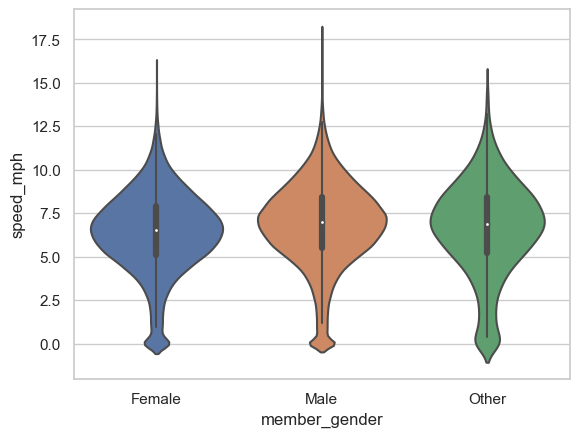

In [47]:
# Examining the relationship between the speed and the gender of the member
sns.violinplot(data=df, x="member_gender", y="speed_mph");

#### Observation
When it comes to the mean, from the violin plot above, the male gender have a higher mean when it comes to speed in miles/hr. majority of the riders clocked in at 5 - 10 miles/hr across genders.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The correlation between duration in seconds and speed in miles per hour is an important factor to consider in transportation and logistics. As you mentioned, a higher speed usually means a shorter duration of the journey, which can be seen as a negative correlation. It is important to note that correlation does not necessarily imply causation, meaning that just because two variables are correlated, it does not necessarily mean that one is causing the other. In this case, there could be other factors that influence both the speed and the duration of a journey, such as traffic, road conditions, and the mode of transportation used. Some of the younger riders spent more time on the journey as observed from the scatter plots. The higher the distance, the higher the duration as well which shows a positive correlation.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

On the other hand, a positive correlation between distance in miles and speed in miles per hour indicates that as the speed increases, the distance covered during the journey increases as well.

## Multivariate Exploration

#### Question 16
What is the relationship between duration, member_gender and user type?

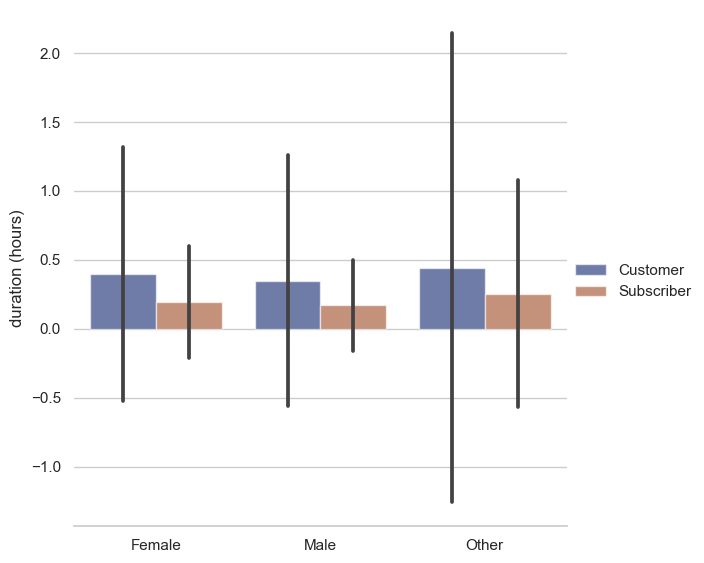

In [48]:
g = sns.catplot(
    data=df, kind="bar",
    x="member_gender", y="duration_hrs", hue="user_type",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "duration (hours)")
g.legend.set_title("");

#### Observation
In the catplot above, it can be observed that most of the trips didn't even last up to half an hour with majority in the "other" category.

#### Question 17
What is the relationship between bike sharing, member_gender and speed in mph?

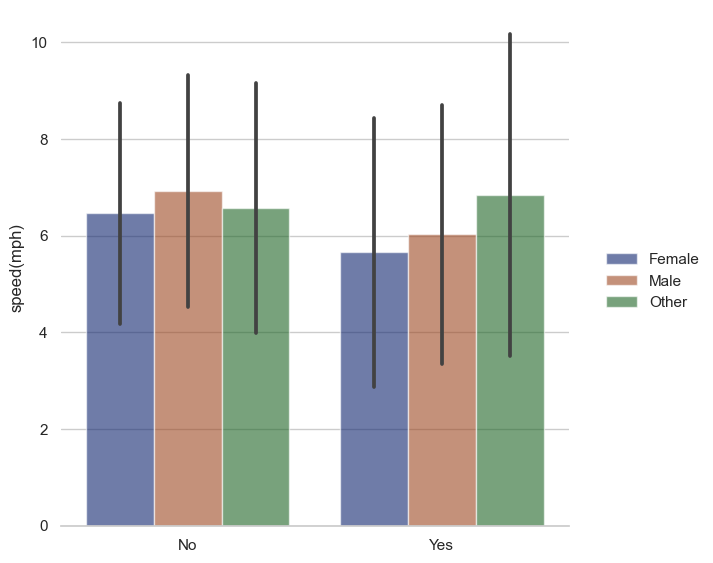

In [49]:
g = sns.catplot(
    data=df, kind="bar",
    x="bike_share_for_all_trip", y="speed_mph", hue="member_gender",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "speed(mph)")
g.legend.set_title("");

#### Observation 
In th catplot above, it shows that majority of the riders didn't go above 8 miles/hour. Also on average, it shows that the males have a higher speed average.

In [50]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,distance_miles,duration_hrs,speed_mph,member_age,day_of_ride_start,day_of_ride_end,start_hour,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,0.338467,14.495833,0.023349,35.0,Thursday,Friday,17,8


#### Question 18
What is the relationship between duration, bikes_hare, user type and the day of ride start?

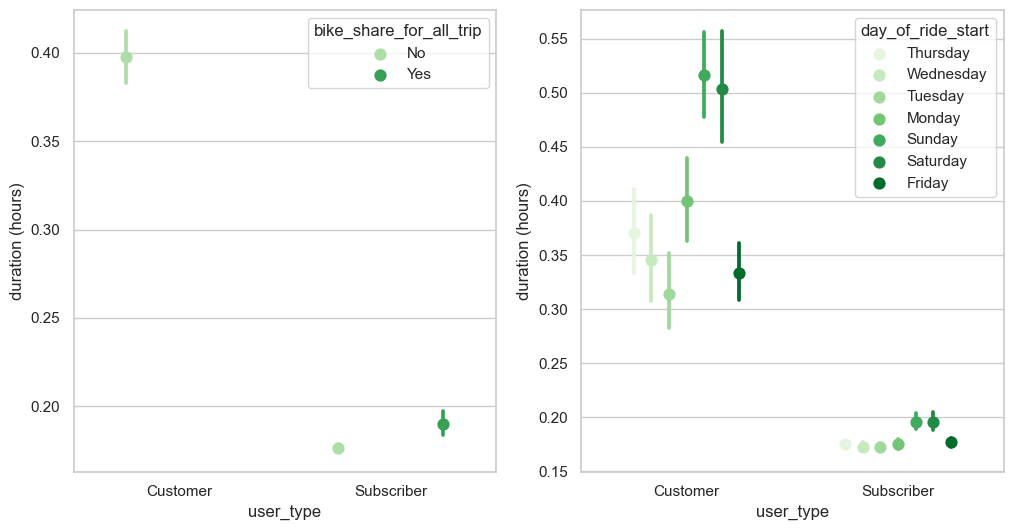

In [51]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])

sns.pointplot(data = df, x = 'user_type', y = 'duration_hrs', hue = 'bike_share_for_all_trip',
             palette = 'Greens', linestyles = '', dodge = 0.5, ax = ax[0])
ax[0].set_title('')
ax[0].set_ylabel('duration (hours)')

sns.pointplot(data = df, x = 'user_type', y = 'duration_hrs', hue = 'day_of_ride_start',
             palette = 'Greens', linestyles = '', dodge = 0.5, ax = ax[1])
ax[1].set_title('')
ax[1].set_ylabel("duration (hours)")

plt.show();

#### Obsevation
From the plots above, one key takeaway is that subscribers generally clocked in at shorter times across bike sharing day of trip features.

#### FUrther investigate the relationship between member gender, user type and speed_mph using a facet grid

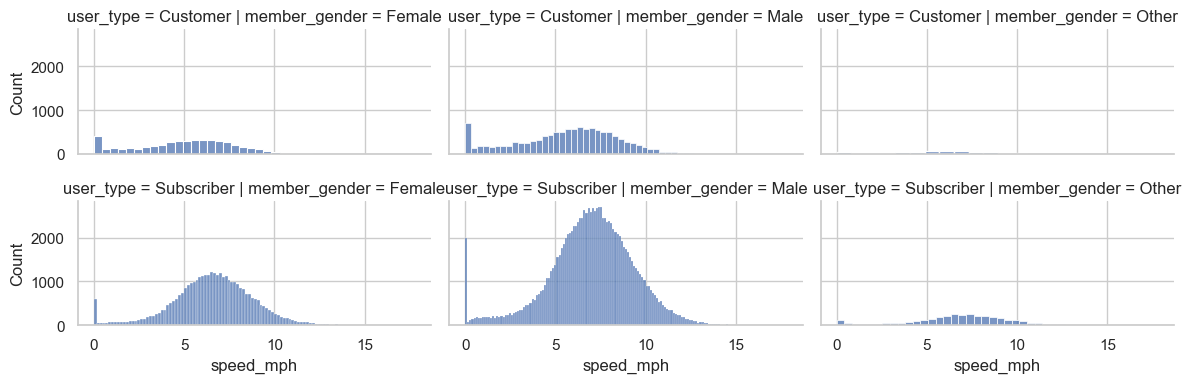

In [52]:
g = sns.FacetGrid(df, col="member_gender",  row="user_type", height=2, aspect=2, legend_out=False)
g.map_dataframe(sns.histplot, x="speed_mph")


#### Observation
The disribution of the speed in mph across the subscriber users follows a normal distribution which suggests the the mean median and mode across values are almost equal.

#### Using facetgrid to understand the releationship between User_type, member_age and speed_mph.

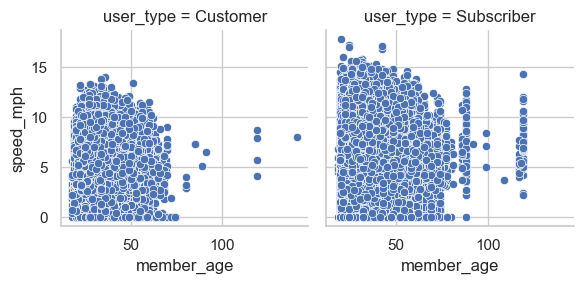

In [53]:
g = sns.FacetGrid(df, col="user_type")
g.map(sns.scatterplot, "member_age", "speed_mph")

#### Observation
From the graph above, it can be seen that the suscribers have more data points and that they have more people recorded above the age of 100.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Taking a look at my feature of interest which is duration, the major influence  on the duration of the trips i would say is the distance between stations and the speed taken for the journey.

### Were there any interesting or surprising interactions between features?

One interesting observation in the dataset is that some of the younger riders spent more time on the journey as opposed to the the older riders who spent less time between stations.

## Conclusions

* Most trips were taken on Thursdays and Tuesdays

* Weekends have the least trip records

* The rush hours; going to work in the morning (8 and 9 hrs) and closing in the evening (17 and 18 hrs) have the highest trip records

* About 90% of the trips were taken by subscribers

* The dataset is just for the months of February and March 2019

* Most of the trips were taken by males (>70%)

* Females spend more duration than males

* Trip durations on weekends are longer than on other weekdays

* The average duration for all trips is about 500 seconds

* Less than 10% of the trips were bike sharing for all trips
